# Interpolation Method

In [7]:
import scipy
import pyccl as ccl
import numpy as np
import pylab as plt
import itertools
import pickle

class Lin_Pk_emulator:
    def __init__(self, n_train, n_k, new = False):
        
        self.k_arr = np.logspace(-4.7,5, n_k)
        self.wc_arr  = np.linspace(0.1, 1, n_train)
        self.h_arr  = np.linspace(0.6,  0.9, n_train)
        
        if new:
            self.Pk_emulator_arr = {}
            for k in self.k_arr:  
                print(k)
                self.Pk_arr  = self.__theory_Pk(k, self.wc_arr, self.h_arr)
                print(len(self.h_arr))
                print(len(self.wc_arr))
                print(self.Pk_arr.shape)
                self.Pk_emulator = scipy.interpolate.interp2d(self.h_arr, self.wc_arr, self.Pk_arr, kind='cubic')
                self.Pk_emulator_arr["{}".format(k)]= self.Pk_emulator
                
            with open('Pk_emulator_arr'+'.pkl', 'wb') as f:
                pickle.dump(self.Pk_emulator_arr, f, pickle.HIGHEST_PROTOCOL)

        else:
            self.Pk_emulator_arr = self.__load_emulator()
            
        return 
            
    ###############
    #PRIVATE METHODS
    ###############
    
    def __theory_Pk(self, k, wc_arr, h_arr):
        output = []
        for i in range(len(wc_arr)):
            row = []
            for j in range(len(h_arr)):
                cosmo = ccl.Cosmology(Omega_c=wc_arr[i], Omega_b=0.049, h=h_arr[j], sigma8=0.81, n_s=0.96)
                row.append(np.log(ccl.power.linear_matter_power(cosmo, k, 1)))
            output.append(np.array(row))
        return np.array(output) 
    
    def __load_emulator(self):
        with open('Pk_emulator_arr'+ '.pkl', 'rb') as f:
            return pickle.load(f)
    
    ###############
    #PUBLIC METHODS
    ###############
    
    def get_Pk(self, h, wc):
        #log lin_Pk
        self.Pk = []
        for k in self.k_arr:
            self.Pk_k=self.Pk_emulator_arr["{}".format(k)](h, wc)[0]
            self.Pk.append(self.Pk_k)
            
        return self.k_arr, np.array(self.Pk)
        

In [8]:
test = Lin_Pk_emulator(5, 10, new = True)

1.9952623149688786e-05
5
5
(5, 5)
0.00023865897868585785
5
5
(5, 5)
0.00285466766349793
5
5
(5, 5)
0.034145488738336005
5
5
(5, 5)
0.4084238652674517
5
5
(5, 5)
4.885273571519382
5
5
(5, 5)
58.434141337351754
5
5
(5, 5)
698.9473207273479
5
5
(5, 5)
8360.306936514631
5
5
(5, 5)
100000.0
5
5
(5, 5)


In [3]:
k_arr, Pk_emulated = test.get_Pk(0.27, 0.67)
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
#k_arr = np.logspace(-4.7,5, 5)
Pk_theory = np.log(ccl.power.linear_matter_power(cosmo, k_arr, 1))

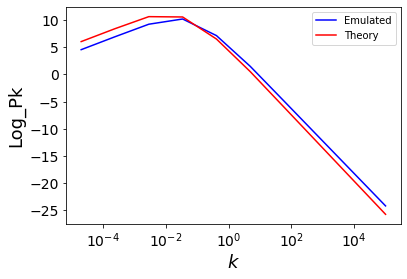

In [4]:
plt.plot(k_arr, Pk_emulated, 'b-', label = 'Emulated')
plt.plot(k_arr, Pk_theory, 'r-', label = 'Theory')
plt.legend()
plt.xlabel('$k$',fontsize=18)
plt.ylabel('Log_Pk',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.show()

In [5]:
Pk_diff = abs(Pk_emulated-Pk_theory)

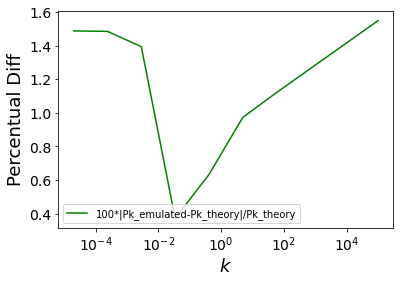

In [6]:
plt.plot(k_arr, Pk_diff, 'g-', label = '100*|Pk_emulated-Pk_theory|/Pk_theory' )
plt.xlabel('$k$',fontsize=18)
plt.ylabel('Percentual Diff',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.legend(loc="lower left")
plt.show()